## MAT 321 - PS3

Author: Marc Aurèle Gilles

* You can (and probably should) discuss assignments with others, Qinxin and me, but you must write and understand any solutions/code that you submit. You can consult any resource you want for this homework, but you should cite sources you used.
* You must upload the assignment to Canvas before the deadline: 04/03/2023 at 11:59pm.
* Question 2 is hard! Ask for help if you're stuck.

Disclaimer: this homework has a lot of text but most of it is background. There is also a lot of code, but most of it is provided for you. Each function you have to complete is indicated by

###ADD YOUR CODE HERE

You should try to understand what the rest of the code does, but you may assume you don't have to change the code. See precept 2 for the syntax of matrix operations if you need it.

## Q1 Matrix equations


A one-term matrix equation is of the form:
$$BXA^T = F $$
where $B \in \mathbb{R}^{m \times m}$, $A \in \mathbb{R}^{n \times n}$, $F \in \mathbb{R}^{m \times n}$ are known matrices, and we seek $X\in \mathbb{R}^{m \times n}$.
The map $L(X) = BXA^T$ is linear:

 $$L(X + \alpha Y) = B(\alpha X + Y)A^T = \alpha B X A^T + BYA^T = \alpha L(X) + L(Y)$$


Thus, one can represent it using a matrix. That matrix is found using the *Kronecker* product of A and B, denoted $A \otimes B$, and the vectorized version of $X$, $\text{vec}(X)$ achieved by stacking the columns of $X$:

$$
X = \begin{bmatrix}
x_{1,1} & x_{1,2} & \dots  & x_{1,n}\\
x_{2,1} & x_{2,2} & \dots  & x_{2,n}\\
\vdots &\vdots & \dots  & \vdots \\
x_{m,1} & x_{2,2} & \dots  & x_{m,n}\\
\end{bmatrix} , \qquad \text{vec}(X) 
= \begin{bmatrix} x_{1,1} \\ x_{2,1}\\
\vdots \\
x_{m,1}\\
x_{1,2}\\
\vdots \\
x_{m,n}  
 \end{bmatrix}
$$

The Kronecker product $A \otimes B$ is defined as the block matrix:

$$
\mathbf{A}\otimes\mathbf{B} = \begin{bmatrix}
  a_{11} \mathbf{B} & \cdots & a_{1n}\mathbf{B} \\
             \vdots & \ddots &           \vdots \\
  a_{n1} \mathbf{B} & \cdots & a_{nn} \mathbf{B}
\end{bmatrix}
$$

More explicitly:

$$
\mathbf{A}\otimes\mathbf{B} = \begin{bmatrix}
   a_{11} b_{11} & a_{11} b_{12} & \cdots & a_{11} b_{1m} &
                   \cdots & \cdots & a_{1n} b_{11} & a_{1n} b_{12} & \cdots & a_{1n} b_{1m} \\
   a_{11} b_{21} & a_{11} b_{22} & \cdots & a_{11} b_{2m} &
                   \cdots & \cdots & a_{1n} b_{21} & a_{1n} b_{22} & \cdots & a_{1n} b_{2m} \\
   \vdots & \vdots & \ddots & \vdots & & & \vdots & \vdots & \ddots & \vdots \\
   a_{11} b_{m1} & a_{11} b_{m2} & \cdots & a_{11} b_{mm} &
                   \cdots & \cdots & a_{1n} b_{m1} & a_{1n} b_{m2} & \cdots & a_{1n} b_
                   {mm} \\
   \vdots & \vdots & & \vdots & \ddots & & \vdots & \vdots & & \vdots \\
   \vdots & \vdots & & \vdots & & \ddots & \vdots & \vdots & & \vdots \\
   a_{n1} b_{11} & a_{n1} b_{12} & \cdots & a_{n1} b_{1m} &
                   \cdots & \cdots & a_{nn} b_{11} & a_{nn} b_{12} & \cdots & a_{nn} b_{1m} \\
   a_{n1} b_{21} & a_{n1} b_{22} & \cdots & a_{n1} b_{2m} &
                   \cdots & \cdots & a_{nn} b_{21} & a_{nn} b_{22} & \cdots & a_{nn} b_{2m} \\
   \vdots & \vdots & \ddots & \vdots & & & \vdots & \vdots & \ddots & \vdots \\
   a_{n1} b_{p1} & a_{n1} b_{m2} & \cdots & a_{n1} b_{mm} &
                   \cdots & \cdots & a_{nn} b_{m1} & a_{nn} b_{m2} & \cdots & a_{nn} b_{mm}
\end{bmatrix}
$$

The matrix $ C = A \otimes B$ has size $mn \times mn $. In numpy, it can be computed in numpy by `np.kron(A,B)`.


Using this notation, we can rewrite the matrix linear system $AXB = F$ into a standard linear system involving a vector of size $nm$.

$$ BXA^T = F \Leftrightarrow (A \otimes B) \text{vec}(X) =  \text{vec}(F)$$

### Q1.1 Not-Kronecker solve  

Write an $O(n^3)$ solver for a one term matrix equations. Assume A and B are $ n \times n$ and invertible.
You may use `np.linalg.solve(C,D)` which solves the system $CX = D$. When given a matrix $D$ as right-hand side, `np.linalg.solve(C,D)` does the following algorithm: perform LU of factorization of $C$, then solve each column of $Cx_i = d_i$ by backsubstition on each column of $D$.


In [ ]:
import numpy as np
def one_term_matrix_equation_solver(A, B, F):
    ## ADD YOUR CODE HERE
    return np.zeros_like(F)

## CODE BELOW IS PROVIDED FOR YOU. NO NEED TO CHANGE IT.

n = 10
A = np.random.randn(n,n)
X = np.random.randn(n,n)
B = np.random.randn(n,n)
F = B @ X @ A.T

Xsolve = one_term_matrix_equation_solver(A, B, F)
# Should be close to machine epsilon ~1e-13 is fine
print('error: ', np.linalg.norm(Xsolve - X )/np.linalg.norm(X))

### Q 1.2 Kronecker solve
Suppose we want to solve 

$$B_1 X A_1^T + B_2 X A_2^T + \dots B_k X A_k^T = F $$

Write a solver to solve this sytem. You can assume every matrix is $n \times n$. What is its complexity (in terms of $n$) ?



### Answer: 1.2 write the complexity here

In [ ]:
import numpy as np

def kronecker_solver(Bs, As, F):
    ## ADD YOUR CODE HERE
    return np.zeros_like(F)

## CODE BELOW IS PROVIDED FOR YOU. NO NEED TO CHANGE IT.

## the vec(X) function implemented in python.
def vec(X):
    return X.T.reshape(-1)

## Inverse of vec function.
def unvec(x):
    n = np.sqrt(x.size).astype(int)
    return x.reshape(n,n).T


n = 10
k = 5
X = np.random.randn(n,n)
As = np.random.randn(k,n,n) # k (nxn) matrices
Bs = np.random.randn(k, n,n)
F = np.zeros((n,n))
for i in range(k):
    F += Bs[i] @ X @ As[i].T

Xsolve = kronecker_solver(Bs, As, F)

# Should be close to machine epsilon ~1e-13 is fine
print('error: ', np.linalg.norm(Xsolve - X )/np.linalg.norm(X))


## Q1.3 Fast Kronecker matvec
Let $C \in \mathbb{R}^{n \times n}$ be a Kronecker matrix such that $C = A \otimes B$ where $A,B\in \mathbb{R}^{\sqrt{n}\times \sqrt{n}}$. 
Write an $O(n^{3/2})$ algorithm to compute $Cx$.

In [ ]:
import numpy as np

def fast_kron_matvec(A,B, x):
    ## ADD YOUR CODE HERE
    return np.zeros_like(x)



## CODE BELOW IS PROVIDED FOR YOU. NO NEED TO CHANGE IT.

def naive_kron_matvec(A,B,x):
    # A O(n^2) algorithm
    return np.kron(A,B) @ x

n_root = 30
n = n_root**2
A = np.random.randn(n_root,n_root) # k (nxn) matrices
B = np.random.randn(n_root,n_root)
x = np.random.randn(n)

b = naive_kron_matvec(A,B,x)
b_fast = fast_kron_matvec(A,B, x)

# Should be close to machine epsilon ~1e-13 is fine
print('error: ', np.linalg.norm(b - b_fast )/np.linalg.norm(b))


# Q2: Cholesky Decomposition of Toeplitz matrices

Recall that the Cholesky decomposition of an SPD matrix A can be computed in two steps iteratively:
* (Step 1) Compute a row of R: $$R_{k,k:} \leftarrow A_{k,k:} / \sqrt{A_{k,k}}$$
* (Step 2) Update Schur complement of $A_{k:,k:}$: $$A_{k+1:,k+1:} \leftarrow A_{k+1:,k+1:} - R_{k,k:}^T R_{k,k:} $$
 
While inverting circulant matrices fast is trivial (you have done it already), inverting Toeplitz matrices fast is far from it, and it is an active area of research.
In this exercise, we will build a Cholesky factorization in $\mathcal{O}(n^2)$ of symmetric positive definite Toeplitz matrices, bringing down the cost from $\mathcal{O}(n^3)$. 
Symmetric Toeplitz matrices are of the form:

$$ 
T = \qquad\begin{bmatrix}
t_0 & t_{1} & t_{2} & t_{3} & t_{4} \\
t_1 & t_0 & t_{1} & t_{2} & t_{3} \\
t_2 & t_1 & t_0 & t_{1} & t_{2} \\
t_3 & t_2 & t_1 & t_0 & t_{1}  \\
t_4 & t_3 & t_2 & t_1 & t_0 
\end{bmatrix}
$$

A crucial property used to create fast Toeplitz solvers is its *displacement structure*, which we now introduce.

Let $Z_n$ be the $n \times n$ "shift-down-by-one" matrix:

$$
Z_n = \begin{bmatrix}
 0 &  &  &  & &  &    \\
1 & 0 &  &  &  &  &   \\
  & 1& 0 &  &  &  &   \\
  &  &1 &0  &  &  &   \\
  &  &  &1 &0  &  &   \\
  &  &  &  &\ddots  &\ddots  &   \\
    &  &  &  &  & 1 & 0 \\
\end{bmatrix}
$$

Note that $Z_n$ is not a permutation matrix (its first row is only 0's). We say an SPD matrix $A$ is *quasi-Toeplitz* if it satisfies the following condition:

$$A - Z_n A Z_n^T = G J G^T $$

where $G \in \mathbb{R}^{n \times 2}$, and $J =  \begin{bmatrix} 1 &  0 \\ 0 & -1 \end{bmatrix}$. Such an equation is called a *displacement rank equation*, and we say quasi-Toeplitz matrices have *displacement rank 2*. The intuition is that displacing the rows and columns just slightly creates a rank $2$ matrix $G J G^T$. The matrix $G$ is called a *generator* of the quasi-Toeplitz matrix A.

Generators are not unique, but we identify a special one: we say $\hat{G}$ is a *proper generator* if it is a generator, and it has a 0 on the (1,2) entry:

$$
\hat{G} = \begin{bmatrix} 
\hat{g}_{11} & 0 \\
\hat{g}_{21} & \hat{g}_{22} \\
\hat{g}_{23} & \hat{g}_{33} \\
\vdots & \vdots \\
 \end{bmatrix} .
$$

1. Prove that SPD Toeplitz matrices are quasi-Toeplitz. That is, find a generator $G$ of an SPD Toeplitz matrix.

2. Show that if $\hat{G}$ is a proper generator, then the first column of $\hat{G}$ is the first row of $A$ divided by the square root of the (1,1) entry of A, that is: $ {\hat{G}_{:,1}}^T = A_{1,:} / \sqrt{a_{11}}$. Hence, if we have access to a proper generator, (Step 1) of Cholesky is trivial.


3. Suppose $G$ is a generator of quasi-Toeplitz SPD matrix $A$. Let 
$$Q = \frac{1}{\sqrt{1 - \gamma^2}} \begin{bmatrix} 1 & -\gamma \\ - \gamma & 1\end{bmatrix}$$
 with $\gamma = \frac{g_{12}}{g_{11}}$ where $g_{i,j}$ is entry $i,j$ of $G$. Show that $GQ$ is a proper generator. (Note that $a_{11} = g_{11}^2 - g_{12}^2$, and $A$ is SPD thus $|g_{11}| > |g_{12}| \implies |\gamma | < 1$.)


4. Let 
$$A = \begin{bmatrix} a_{11} & a_{1,2}^T\\
a_{1,2} & A_{2,2} \end{bmatrix}, \qquad c = \begin{bmatrix} a_{11} \\ a_{1,2} \end{bmatrix} \qquad  S = A_{2,2} -  a_{1,2} a_{1,2}^T \frac{1}{a_{11}}$$
i.e., $S \in \mathbb{R}^{(n-1) \times (n-1)} $ is the Schur complement of A, $c$ is the first column of $A$; and let $\hat{G}$ be a proper generator of $A$.
Show that the matrix: 
$$
A - c c^T \frac{1}{a_{11}} = \begin{bmatrix} 0 & 0 \\ 0 & S \end{bmatrix}
$$
is quasi-Toeplitz.
Conclude that $S$ is also quasi-Toeplitz and that $G_2$:

$$G_2 = \begin{bmatrix} \hat{g}_{1,1} & \hat{g}_{2,2}\\
\hat{g}_{2,1} & \hat{g}_{3,2}\\
\vdots & \vdots \\
\hat{g}_{n-1,1} & \hat{g}_{n,2}\\
\end{bmatrix} \in \mathbb{R}^{(n-1) \times 2 }$$

is a generator for $S$. (Here, $\hat{g}_{i,j} $ denotes entry $i,j$ of $\hat{G}$, the proper generator of A). That is, we want to show:
$$S - Z_{n-1}S Z_{n-1}^T = G_2J G_2^T   $$

5. From part 2, you can find a new row of $R$ (the Cholesky factor of T) purely from the proper generator.  Parts 3 and 4 should give you an $O(n)$ formula to compute the proper generator of the Schur complement given a proper generator of the original matrix. Using these identities, implement a $O(n^2)$ Cholesky factorization of a Toeplitz symmetric positive definite below.


## Q2.1-Q2.4 Add your answers to parts 1-4 here

In [ ]:
import scipy.linalg
import numpy as np

def fast_toeplitz_cholesky(c):
    n = c.size
    R = np.zeros((n,n))
    ## ADD YOUR CODE HERE

    return R

## CODE BELOW IS PROVIDED FOR YOU. NO NEED TO CHANGE IT.


# A helper function you may use
def get_Q(gamma):
    if np.abs(gamma) >= 1:
        print('Something went wrong! |gamma| > 1')
    Q  = np.array( [[1, -gamma], [ -gamma, 1]] ) / ( np.sqrt( 1- gamma**2))
    return Q


# Form a random Toeplitz SPD matrix using its circulant embedding.
n = 10
fx = np.random.randn(10)**2
x = np.fft.ifft(fx)
C = scipy.linalg.circulant(x)
T = C[:n//2, :n//2].real
s,_ = np.linalg.eig(T)
print('T symmetric?: ', np.linalg.norm(T - T.T) / np.linalg.norm(T))
print('T positive definite?: ', np.all(s > 0) )

c = T[:,0]

R = fast_toeplitz_cholesky(c)

# should be close to machine epsilon. ~1e-13 is fine
print('error: ', np.linalg.norm(R.T @ R - T)/np.linalg.norm(T) ) 
print('R upper triangular?: ', np.linalg.norm( np.triu(R) - R )/np.linalg.norm(R) )


# Q3: 2D averaging and deblurring

Cryogenic electron-micrscopy (cryo-EM) is a technique that allows imaging of proteins at atomic resolutions ( $~ 1 \AA = 10^{-10}$ meters ). Images collected by cryo-EM are unfortunately extremely noisy and blurred by the point spread function (PSF) of the microscope, like the one below. 
<figure>
<p align="center">
<img src="cryo_em_image.png" height="280">
  <figcaption> Figure: A typical image of a protein captured by cryo-EM</figcaption>
<p>
</figure>

They are so noisy that one cannot hope to recover a denoised and deblurred image from a single measurement even with a good regularization strategy. However, since we have access to a large amount of noisy images, careful averaging and regularization allows us to reconstruct highly detailed images even when the raw measurement "looks" like pure noise. 

The images are modelled as:

$$y_i = C_i x + \epsilon $$

where $x$ is clean image, $C_i$ is the blurring matrix, $\epsilon$ is white noise and $y_i$ is the blurred, noisy image. Here we think of images as vectors i.e. $x = \text{vec}(X) $, and $X \in \mathbb{R}^{n \times n}$ and $x \in \mathbb{R}^{N}$ with $N = n^2$. 
Our goal is to write a fast algorithm to recover a single clean image $x$ from a collection of noisy images $y_i$. Note that each image $y_i$ is blurred by a different blurring matrix $C_i$ but is a blurred version of the same clean image $x$.

The operators $C_i$ are typically modeled as 2-D periodic convolutions. In 1D, these matrices are circulant matrices. In 2D, these are not circulant (rather, they look like $C \otimes C$ where $C$ is circulant, which are "block circulant with circulant blocks" ). However, they inherit the special property that they are easily diagonalized:

$$
C_i = F_{2}^{-1} D_i F_{2} \in \mathbb{R}^{N \times N}
$$

where $F_{2}$ is the 2d Discrete Fourier Transform and $D_i$ is a diagonal matrix. Mat-vecs with $F_{2}$ can be computed in $\mathcal{O}(N \log N) $ in numpy by `np.fft.fft2()`, and with its inverse by `np.fft.ifft2()` . Both of these functions take the "matrix" version as input (thus one should input the image $X$, and not $\text{vec}(X)$).

Below is the code that loads a test image and simulates a physically accurate convolution (blurring) and noise.

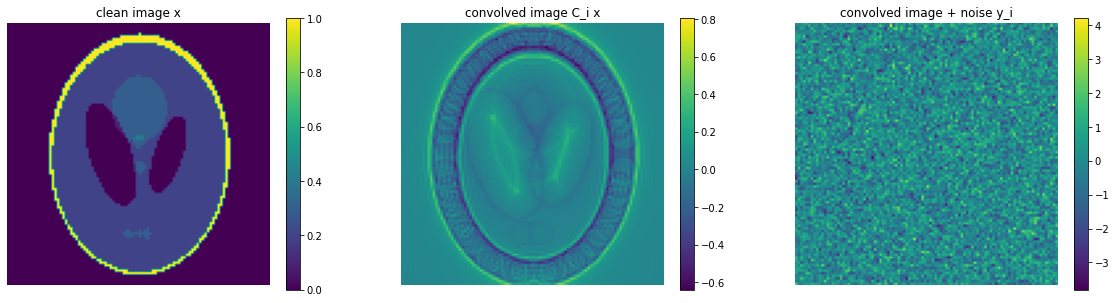

In [1]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
## THIS WHOLE CELL IS PROVIDED FOR YOU. NO NEED TO CHANGE ANY CODE HERE.

def get_PSF_diagonal(defocus,n):
    X = np.mgrid[-n//2:n//2, -n//2:n//2]
    R = np.sqrt(X[0]**2 + X[1]**2)
    return np.fft.ifftshift(np.sin(- np.pi*defocus * R + 0.1))

def blur_image(image, kernel):
    return np.fft.ifft2(np.fft.fft2(image, norm = 'ortho') * kernel, norm = 'ortho')

def display_subimage(img, ax, title):
    im = ax.imshow(img.reshape(n,n))
    ax.set_title(title)
    ax.set_axis_off()
    plt.colorbar(im, ax=ax)

sigma = 1
tau = 1
clean_image = data.shepp_logan_phantom()[::4,::4]

n = 100
convolved_image = blur_image(clean_image, get_PSF_diagonal(0.1,100))
convolved_noisy_image = convolved_image + sigma * np.random.randn(n,n)

fig, axs = plt.subplots(1, 3,figsize = (20,5))
display_subimage(clean_image, axs[0], 'clean image x')
display_subimage(convolved_image.real, axs[1], 'convolved image C_i x')
display_subimage(convolved_noisy_image.real, axs[2], 'convolved image + noise y_i')


Given a set of noisy images $y_i$, statistical models of the noise and signal, one can describe statistically the optimal estimate of $x$, it is known as the *maximum likelihood estimate* (MLE). In our case, the MLE is the solution of the following least-squares problem:

$$
\hat{x} =  \underset{x}{\text{argmin}} \left\lbrace \left(  \sum_{i=1}^{m} \|y_i - C_i x \|_2^2 \right) + \lambda^2 \|x\|_2^2  \right\rbrace
$$

where the images $y_i$ and the operators $C_i$ are known, and $\lambda^2 = \frac{\sigma^2}{\tau^2} $, the variance of the noise $\sigma^2 $ and the variance of the signal $\tau^2$, which are both known quantities. 

### Q3.1 
Write the MLE as a standard least-squares problem, that is, find $A$ and $b$ such that 

$$\hat{x} = \underset{x}{\text{argmin}} \|A x - b\|_2^2$$

Suppose we solve the above system in a standard way: perform an economy QR on $A$. What would be the complexity of this solution in terms of $n$ and $m$ ? (Recall, images are of size $n \times n$ and $m$ is the number of images).


### 3.1 Add your answer here

### Q3.2 
The solution by QR proposed above is prohibitively expensive even for small datasets of images: a rule of thumb is that you should generally avoid dense linear algebra with matrices larger than $10,000\times 10,000$, and the matrix you would need to QR is much larger than that. We thus need a different solution.

Derive the normal equations and describe a $\mathcal{O(m n^2 \log(n))}$ algorithm to solve them. 
*  You should not need to explicitely form the matrix $C_i$. You only need the diagonal of the diagonal matrices $d_i = \text{diag}(D_i) \in \mathbb{R}^{n^2}$. You are provided the vector $k_i \in \mathbb{R}^{n \times n}$, which is the matrix version of the diagonal of $d_i$ that is:
$\text{vec}(k_i) = \text{diag}(D_i)$. 
* You may use the fact that $F_2$ is "almost unitary" : $F_2^{-1} = \frac{1}{N} F_2^* $. You may want to write $ C_i = F_2^{-1} D_i F_i = \hat{F}_2^{-1} D_i \hat{F}_2$, where $ \hat{F}_2 = \frac{1}{\sqrt{N}}F_2$ is unitary. You can compute $\hat{F}_2x$ using `np.fft.fft2(X, norm = 'ortho')` and $\hat{F}^{-1}_2x$ using `np.fft.ifft2(X, norm = 'ortho')`.

### 3.2 Add your answer here


## Q3.3 
Implement your fast deblurring/averaging algorithm derived in the previous section below. 

In [ ]:
# ( You need to have run the previous cell before you run this one)

def average_and_deblur(images, ks, lambda_val = 1):
    ## ADD YOUR CODE HERE
    return np.zeros_like(images[0])


## CODE BELOW IS PROVIDED FOR YOU. NO NEED TO CHANGE IT.

n = 100 # Images of size n x n
m = 1000 # Number of images
noisy_images = np.zeros((m,n,n))
ks = np.zeros((m,n,n)) 
# diagonal of matrix D_i, C_i = F_2^{-1} D_i F_2
# The diagonal vectors of size (n^2) are stored as matrices of size (n x n) 

# Simulate some defocus values, which defines the point spread function.
defocus = np.random.rand(m)*0.1 + 0.05

tau = 1
lambda_val = sigma / tau
for i in range(m):
    # Get kernel
    ks[i] = get_PSF_diagonal(defocus[i],n)
    # Blur image
    noisy_images[i] = blur_image(clean_image, ks[i]) 
    # Add noise
    noisy_images[i] += np.random.randn(n,n) * sigma


averaged_deblurred_image = average_and_deblur(noisy_images, ks, lambda_val).real

fig, axs = plt.subplots(1, 3,figsize = (20,5))
display_subimage(clean_image, axs[0], 'clean image x')
display_subimage(noisy_images[0], axs[1], 'one  noisy image')
display_subimage(averaged_deblurred_image, axs[2], 'deblurred, denoised image')

# relative error should be around ~0.2
print('relative error:', np.linalg.norm(clean_image - averaged_deblurred_image) / np.linalg.norm(clean_image))

# Extra credit

For those of you who can't get enough numerics, I will point to papers that are relevant to the class. If you implement the method and reproduce some of the findings in those paper, you can get extra credit for the class. You can hand them in anytime before the final exam is due.

- We have covered one method in the class for low-rank approximation of a matrix: the SVD. While it's the optimal one, it is also prohibitive in many cases. A simple yet effective strategy for low-rank approximation for SPD matrices is pivoted Cholesky. This recent paper gives a nearly optimal pivoted Cholesky https://arxiv.org/abs/2207.06503
- "Superfast" Toeplitz solver. We have brought the complexity of Toeplitz solvers from $\mathcal{O}(n^3)$ to $\mathcal{O}(n^2)$ in this homework. It turns out, this can be even faster: $\mathcal{O}(n \log^d(n)) $ for some $d$. You may implement any superfast Toeplitz solver you wish, but the following one is one of the simplest https://epubs.siam.org/doi/10.1137/S089547980241791X



